In [86]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

from scipy.integrate import cumulative_trapezoid

import warnings
warnings.filterwarnings("ignore")

In [87]:
x=0.5*math.pi
math.sin(x)+math.cos(x)

1.0

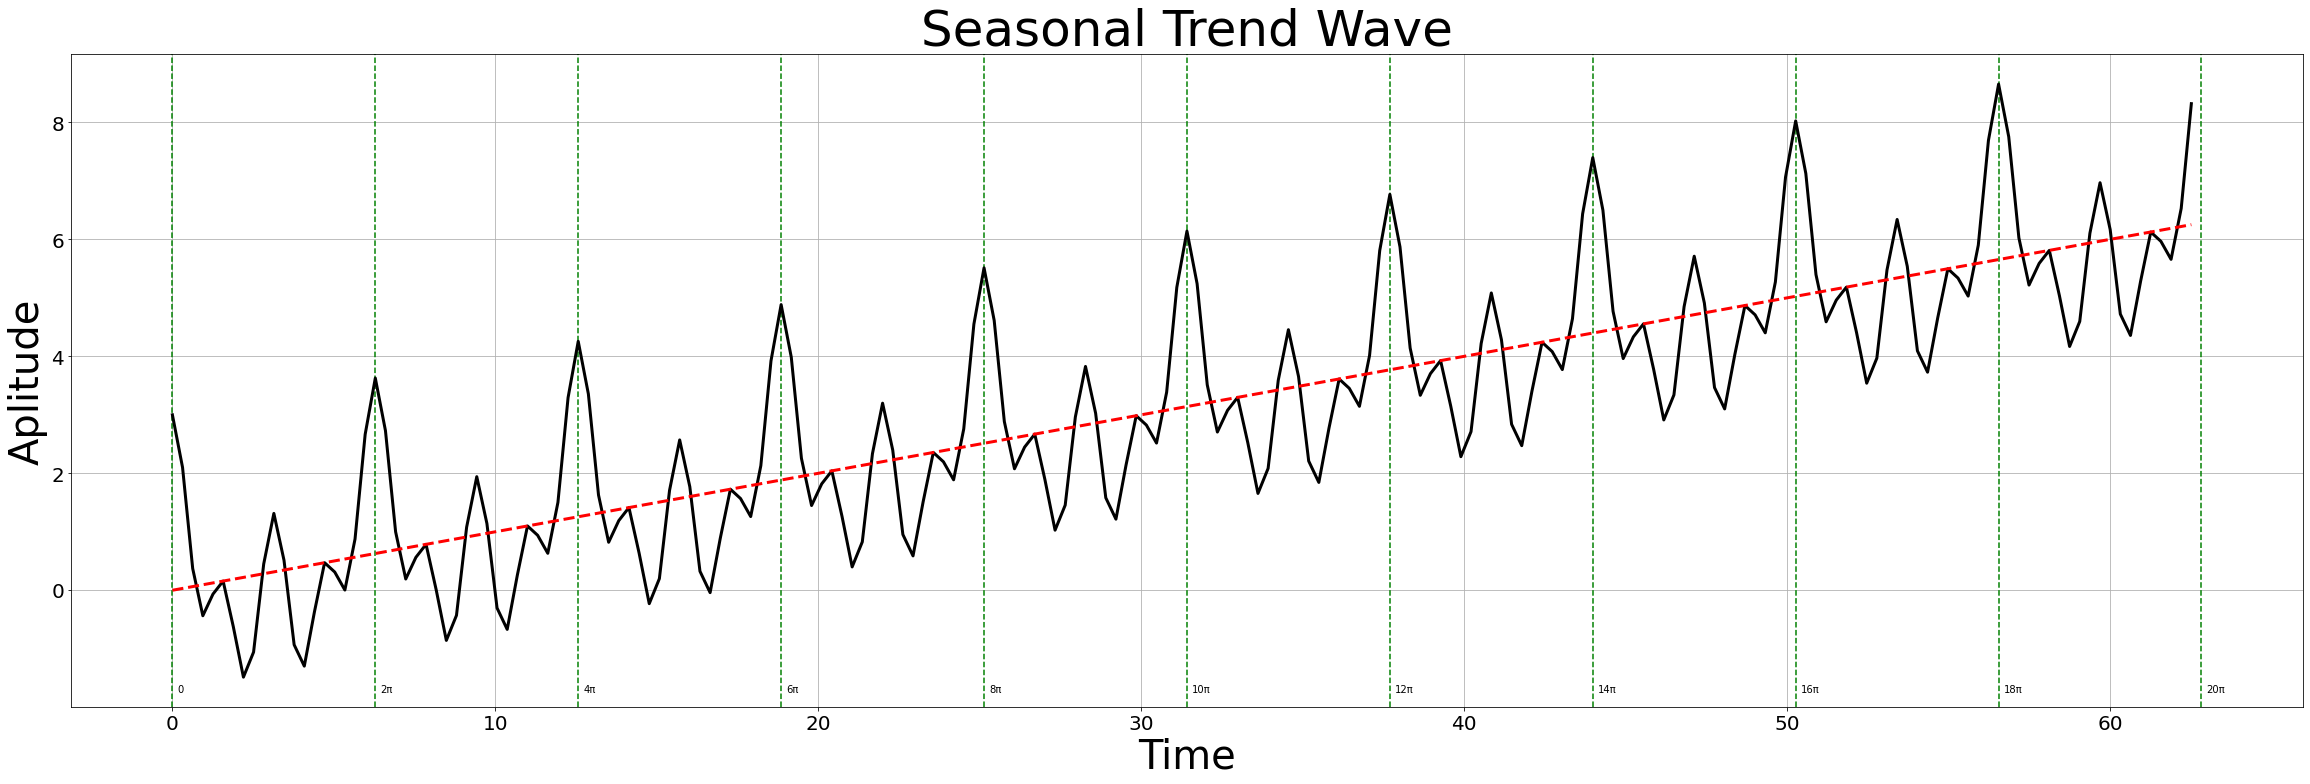

In [130]:
start=0
end=20*math.pi
inc=0.1*math.pi

time=np.arange(start,end,inc)
data=np.cos(time)+np.cos(2*time)+np.cos(4*time)+0.1*pow(time,1)
data2=0.1*time

plt.figure(figsize=(40,12))
plt.title('Seasonal Trend Wave', fontsize=50)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Aplitude', fontsize=40)
plt.grid(True, which='both')
plt.axvline(x=0*math.pi, color='green', linestyle='--')
plt.annotate("0", (0*math.pi+0.15, -1.75))
plt.axvline(x=2*math.pi, color='green', linestyle='--')
plt.annotate("2π", (2*math.pi+0.15, -1.75))
plt.axvline(x=4*math.pi, color='green', linestyle='--')
plt.annotate("4π", (4*math.pi+0.15, -1.75))
plt.axvline(x=6*math.pi, color='green', linestyle='--')
plt.annotate("6π", (6*math.pi+0.15, -1.75))
plt.axvline(x=8*math.pi, color='green', linestyle='--')
plt.annotate("8π", (8*math.pi+0.15, -1.75))
plt.axvline(x=10*math.pi, color='green', linestyle='--')
plt.annotate("10π", (10*math.pi+0.15, -1.75))
plt.axvline(x=12*math.pi, color='green', linestyle='--')
plt.annotate("12π", (12*math.pi+0.15, -1.75))
plt.axvline(x=14*math.pi, color='green', linestyle='--')
plt.annotate("14π", (14*math.pi+0.15, -1.75))
plt.axvline(x=16*math.pi, color='green', linestyle='--')
plt.annotate("16π", (16*math.pi+0.15, -1.75))
plt.axvline(x=18*math.pi, color='green', linestyle='--')
plt.annotate("18π", (18*math.pi+0.15, -1.75))
plt.axvline(x=20*math.pi, color='green', linestyle='--')
plt.annotate("20π", (20*math.pi+0.15, -1.75))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(time, data, color='black', linewidth=3.0)
plt.plot(time, data2, color='red', linewidth=3.0, linestyle='--')

plt.savefig('Seasonal Trend Example.png')

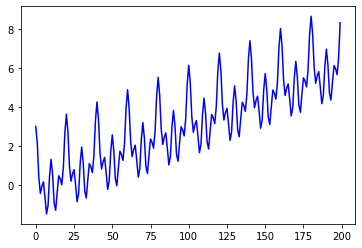

In [89]:
plt.plot(data[0:699], color='blue')

In [90]:
x = {'time': time, 'amplitude': data}
df = pd.DataFrame(data=x)
print(f"This dataset has {len(df)} datasets")
df.head(10)

This dataset has 200 datasets


,time,amplitude
0,0.000000,3.000000
1,0.314159,2.100506
2,0.628319,0.371849
3,0.942478,-0.436001
4,1.256637,-0.065319
5,1.570796,0.157080
6,1.884956,-0.620521
7,2.199115,-1.485908
8,2.513274,-1.057690
9,2.827433,0.449721


In [91]:
first_diff = df['amplitude'].diff()[1:]

In [92]:
first_diff

1     -0.899494
2     -1.728658
3     -0.807850
4      0.370682
5      0.222399
         ...   
195    0.840433
196   -0.159567
197   -0.307850
198    0.870682
199    1.791489
Name: amplitude, Length: 199, dtype: float64

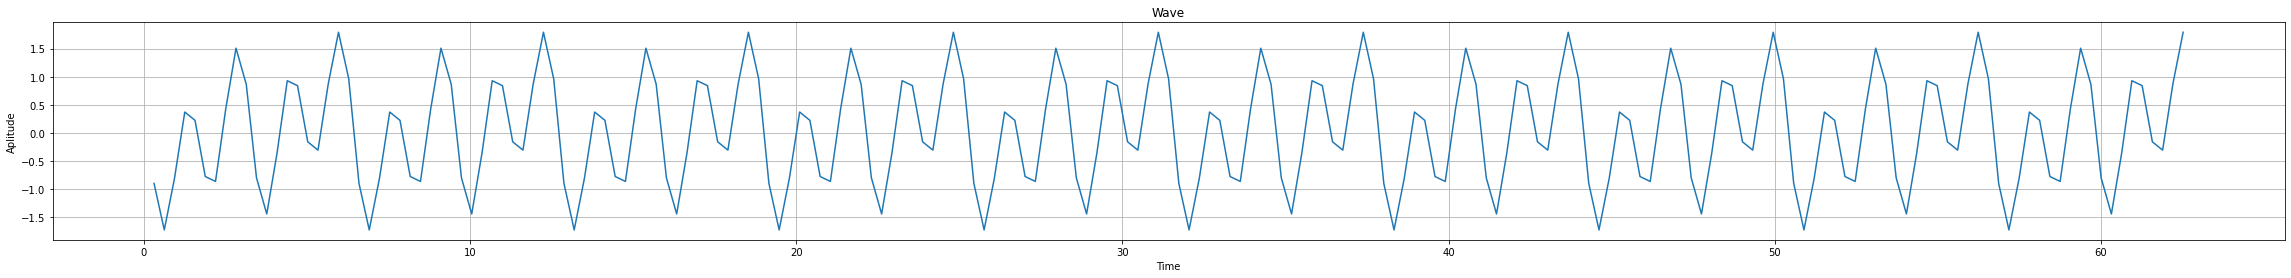

In [93]:
new_time=time[1:]

plt.figure(figsize=(40,4))
plt.title('Wave')
plt.xlabel('Time')
plt.ylabel('Aplitude')
plt.grid(True, which='both')
plt.plot(new_time,first_diff)

In [94]:
used_dataset = df['amplitude'] 
used_dataset

0      3.000000
1      2.100506
2      0.371849
3     -0.436001
4     -0.065319
         ...   
195    6.126106
196    5.966539
197    5.658689
198    6.529370
199    8.320860
Name: amplitude, Length: 200, dtype: float64

<BarContainer object of 20 artists>

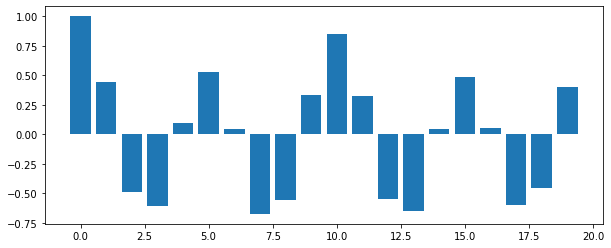

In [95]:
plt.figure(figsize=(10,4))
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

In [96]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plt.figure(figsize=(20,10))
# plot_acf(used_dataset)
# plt.show()

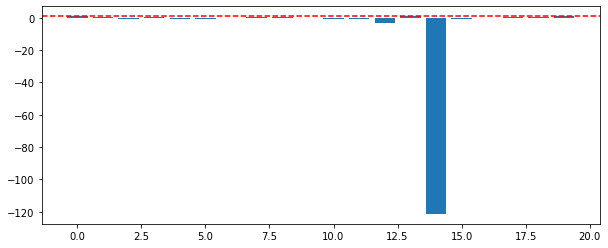

In [97]:
plt.figure(figsize=(10,4))
pacf_vals = pacf(first_diff)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.axhline(y=1, color='red', linestyle='--')

p is 0 since it has no significant positive spikes
d is 1 from the first difference
q is 0 significant negative spikes
P is 1 since it has a significant positive spike
D is 0 from the first seasonal difference
Q is 1 significant negative seasonal spikes
m is 10 from the seasonal analysis


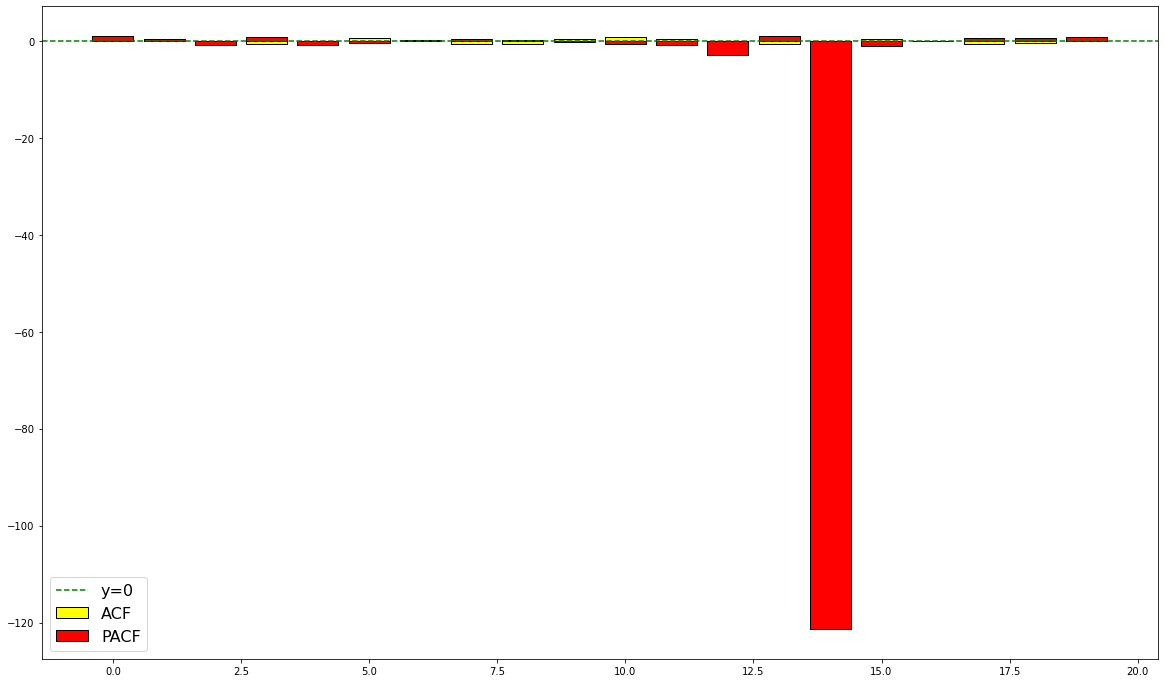

In [98]:
plt.figure(figsize=(20,12))
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags], color='yellow', edgecolor='black')
plt.bar(range(num_lags), pacf_vals[:num_lags], color='red' , edgecolor='black')
plt.axhline(y=0, color='green', linestyle='--')

plt.legend(('y=0', 'ACF', 'PACF'), fontsize=16)

print("p is 0 since it has no significant positive spikes")
print("d is 1 from the first difference")
print("q is 0 significant negative spikes")
print("P is 1 since it has a significant positive spike")
print("D is 0 from the first seasonal difference")
print("Q is 1 significant negative seasonal spikes")
print("m is 10 from the seasonal analysis")

In [99]:
# plt.figure(figsize=(20,10))
# plot_pacf(used_dataset)
# plt.show()

In [100]:
percent_test=80
percent_test=percent_test/100

time=df['time'] 
time_point=time[round(len(used_dataset)*percent_test)]
time_point

train, test = used_dataset.loc[df['time'] <= time_point], used_dataset.loc[df['time'] > time_point]

print(f"Number of Training Data: {train.shape[0]}")
print(f"Number of Testing Data: {test.shape[0]}")

Number of Training Data: 161
Number of Testing Data: 39


In [101]:
order = (0,1,0)
seasonal_order = (1, 0, 1, 10)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)

model_fit = model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52824D-01    |proj g|=  1.88409D+00

At iterate    5    f=  5.89522D-01    |proj g|=  9.39148D-01

At iterate   10    f=  2.36767D-01    |proj g|=  1.10936D-01

At iterate   15    f=  1.56563D-01    |proj g|=  3.23284D-01

At iterate   20    f=  1.23755D-01    |proj g|=  4.69026D-02
  ys=-1.483E-02  -gs= 1.145E-02 BFGS update SKIPPED

At iterate   25    f=  1.18659D-01    |proj g|=  3.64859D-02

At iterate   30    f=  1.18490D-01    |proj g|=  5.80587D-03


 This problem is unconstrained.



At iterate   35    f=  1.18490D-01    |proj g|=  1.49451D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     66      1     1     0   1.495D-03   1.185D-01
  F =  0.11848963157908847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                      SARIMAX Results                                       
Dep. Variable:                            amplitude   No. Observations:                  161
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 10)   Log Likelihood                 -19.077
Date:                              Wed, 24 Aug 2022   AIC                         

In [102]:
predictions = model_fit.forecast(len(test))
predictions = pd.Series(predictions, index=test.index)
residuals = test - predictions

Text(0, 0.5, 'Error')

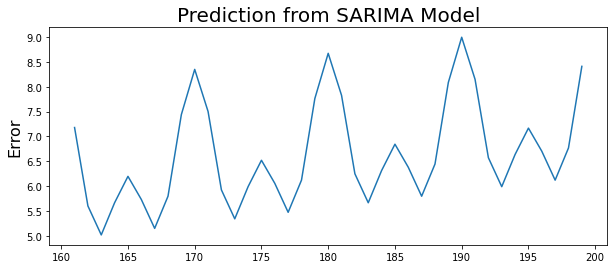

In [103]:
plt.figure(figsize=(10,4))
plt.plot(predictions)
#plt.axhline(0, linestyle='--', color='k')
plt.title('Prediction from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Error')

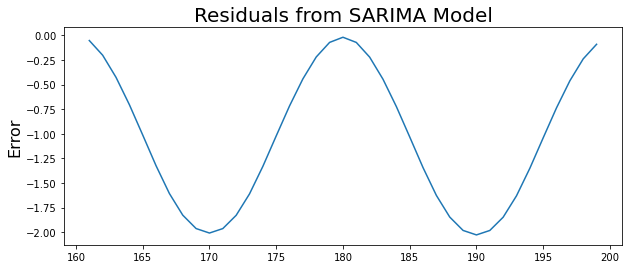

In [104]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
#plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

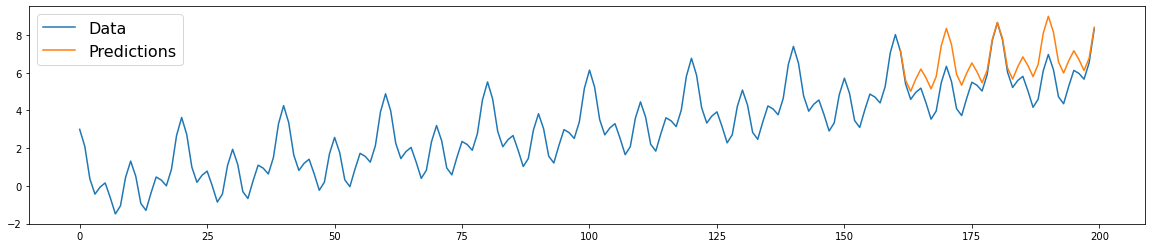

In [105]:
plt.figure(figsize=(20,4))

plt.plot(data)
plt.plot(predictions)
#plt.plot(residuals)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [106]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test)),4))

Mean Absolute Percent Error: 0.2108


In [107]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.2630792939637303


# Using the Rolling Forecast Origin

In [108]:
rolling_predictions = test.copy()

In [109]:
train_end=len(train)
train_end

161

In [110]:
for train_end in test.index:
    train = used_dataset[:train_end-0]
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52824D-01    |proj g|=  1.88409D+00

At iterate    5    f=  5.89522D-01    |proj g|=  9.39148D-01

At iterate   10    f=  2.36767D-01    |proj g|=  1.10936D-01

At iterate   15    f=  1.56563D-01    |proj g|=  3.23284D-01

At iterate   20    f=  1.23755D-01    |proj g|=  4.69026D-02
  ys=-1.483E-02  -gs= 1.145E-02 BFGS update SKIPPED

At iterate   25    f=  1.18659D-01    |proj g|=  3.64859D-02

At iterate   30    f=  1.18490D-01    |proj g|=  5.80587D-03


 This problem is unconstrained.



At iterate   35    f=  1.18490D-01    |proj g|=  1.49451D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     66      1     1     0   1.495D-03   1.185D-01
  F =  0.11848963157908847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22574D-01    |proj g|=  8.08700D-01

At iterate    5    f=  4.12312D-01    |proj g|=  2.22139D-01

At iterate   10    f=  2.06578D-01    |proj g|=  1.21665D-01

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  1.15125D-01    |proj g|=  2.48968D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     98      2     1     0   2.490D-04   1.151D-01
  F =  0.11512490114494572     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20064D-01    |proj g|=  7.76346D-01

At iterate    5    f=  4.18906D-01    |proj g|=  1.74171D-01

At iterate   10    f=  2.12539D-01    |proj g|=  1.32371D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35455D-01    |proj g|=  9.91530D-01

At iterate    5    f=  3.42042D-01    |proj g|=  1.68156D-01

At iterate   10    f=  2.09661D-01    |proj g|=  2.84872D-01

At iterate   15    f=  1.37891D-01    |proj g|=  5.00526D-02

At iterate   20    f=  1.18528D-01    |proj g|=  4.62758D-01

At iterate   25    f=  1.12331D-01    |proj g|=  1.14614D-02

At iterate   30    f=  1.12208D-01    |proj g|=  3.15202D-03
  ys=-4.543E-08  -gs= 9.366E-09 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     93      2     1     0   3.466D-04   1.122D-01
  F =  0.11220762797587200     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41223D-01    |proj g|=  2.12573D+00

At iterate    5    f=  5.52591D-01    |proj g|=  3.65858D-01

At iterate   10    f=  2.44672D-01    |proj g|=  2.01375D-01

At iterate   15    f=  1.42174D-01    |proj g|=  8.67816D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  1.11453D-01    |proj g|=  2.17240D-02

At iterate   35    f=  1.11139D-01    |proj g|=  6.50607D-02
  ys=-8.947E-08  -gs= 1.835E-08 BFGS update SKIPPED

At iterate   40    f=  1.11073D-01    |proj g|=  3.43746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40    113      2     2     0   3.437D-03   1.111D-01
  F =  0.11107343099443866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74584D-01    |proj g|=  4.90843D-01

At iterate    5    f=  5.42504D-01    |proj g|=  5.75223D-01

At iterate   10    f=  2.53286D-01    |proj g|=  3.02311D-01

At iterate   15    f=  1.54593D-01    |proj g|=  1.05592D-01

At iterate   20    f=  1.21772D-01    |proj g|=  8.33215D-02

At iterate   25    f=  1.16042D-01    |proj g|=  2.05386D-02

At iterate   30    f=  1.16031D-01    |proj g|=  2.36979D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  1.16031D-01    |proj g|=  1.14430D-03
  ys=-2.231E-08  -gs= 4.253E-08 BFGS update SKIPPED
  ys=-1.980E-07  -gs= 1.268E-07 BFGS update SKIPPED

At iterate   40    f=  1.16031D-01    |proj g|=  2.93192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40    125      3     2     0   2.932D-04   1.160D-01
  F =  0.11603052488022519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  1.12239D-01    |proj g|=  1.12689D-03

At iterate   45    f=  1.12239D-01    |proj g|=  3.97887D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     87      1     0     0   3.979D-04   1.122D-01
  F =  0.11223859739229868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22226D-01    |proj g|=  8.33628D-01

At iterate    5    f=  3.76528D-01    |proj g|=  2.72211D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  1.06976D-01    |proj g|=  3.60516D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     48      1     0     0   4.628D-03   1.068D-01
  F =  0.10675184120031531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20328D-01    |proj g|=  9.08681D-01

At iterate    5    f=  4.03008D-01    |proj g|=  9.70969D-02

At iterate   10    f=  1.99375D-01    |proj g|=  3.20834D-01

At itera

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  3.52149D-01    |proj g|=  1.45277D-01

At iterate   10    f=  2.10019D-01    |proj g|=  1.33184D-01

At iterate   15    f=  1.32188D-01    |proj g|=  1.00011D-01

At iterate   20    f=  1.04961D-01    |proj g|=  3.62447D-01
  ys=-4.335E-02  -gs= 1.270E-02 BFGS update SKIPPED

At iterate   25    f=  1.02006D-01    |proj g|=  1.91997D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     74      2     1     0   1.223D-03   1.020D-01
  F =  0.10200050151017763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.15263D-01    |proj g|=  1.03806D-01

At iterate   10    f=  2.05958D-01    |proj g|=  1.32558D-01

At iterate   15    f=  1.27543D-01    |proj g|=  6.32947D-02

At iterate   20    f=  1.04484D-01    |proj g|=  1.73399D-01

At iterate   25    f=  1.01346D-01    |proj g|=  1.44601D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     91      2     0     0   1.446D-03   1.013D-01
  F =  0.10134590330730993     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20762D-01    |proj g|=  7.27027D-01

At iterate    5    f=  4.46851D-01    |proj g|=  3.23283D-01

At iterate   10    f=  2.11637D-01    |proj g|=  1.40187D-01

At iterate   15    f=  1.30150D-01    |proj g|=  7.37729D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  1.04017D-01    |proj g|=  3.76667D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     72      2     0     0   4.784D-04   1.040D-01
  F =  0.10401666138346059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20771D-01    |proj g|=  7.42268D-01

At iterate    5    f=  4.38066D-01    |proj g|=  2.82296D-01

At iterate   10    f=  2.09039D-01    |proj g|=  2.07727D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  1.34956D-01    |proj g|=  1.80709D-02

At iterate   20    f=  1.08177D-01    |proj g|=  2.57346D-01

At iterate   25    f=  1.05730D-01    |proj g|=  2.70503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     60      1     0     0   6.312D-04   1.057D-01
  F =  0.10572968811638357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30649D-01    |proj g|=  7.13617D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.30962D-01    |proj g|=  5.39355D-02

At iterate   20    f=  1.07034D-01    |proj g|=  4.08770D-02
  ys=-3.893E-04  -gs= 1.672E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     46      1     1     0   4.400D-02   1.030D-01
  F =  0.10301083767225319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18515D-01    |proj g|=  7.68060D-01

At iterate    5  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate    5    f=  3.69550D-01    |proj g|=  3.09065D-01

At iterate   10    f=  1.72783D-01    |proj g|=  1.62511D-01

At iterate   15    f=  1.14622D-01    |proj g|=  5.47388D-02

At iterate   20    f=  9.89871D-02    |proj g|=  1.78851D-01

At iterate   25    f=  9.75456D-02    |proj g|=  3.09272D-03

At iterate   30    f=  9.74770D-02    |proj g|=  4.84495D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   35    f=  9.74659D-02    |proj g|=  1.46264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     77      2     0     0   1.463D-03   9.747D-02
  F =   9.7465891636208293E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02693D-01    |proj g|=  7.09284D-01

At iterate    5    f=  5.48637D-01    |proj g|=  7.58633D-01

At iterate   10    f=  2.39533D-01    |proj g|=  3.26131D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.42334D-01    |proj g|=  6.33118D-01

At iterate   10    f=  1.94307D-01    |proj g|=  1.16853D-01

At iterate   15    f=  1.14704D-01    |proj g|=  6.04036D-02

At iterate   20    f=  9.90687D-02    |proj g|=  1.97732D-01
  ys=-7.526E-02  -gs= 5.729E-03 BFGS update SKIPPED

At iterate   25    f=  9.46866D-02    |proj g|=  2.76388D-01

At iterate   30    f=  9.35905D-02    |proj g|=  2.07556D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     91      2     1     0   8.795D-04   9.359D-02
  F =   9.3590411291000375E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29044D-01    |proj g|=  9.70376D-01

At iterate    5    f=  3.47934D-01    |proj g|=  5.00267D-01

At iterate   10    f=  2.40210D-01    |proj g|=  2.25957D-01

At iterate   15    f=  1.47357D-01    |proj g|=  3.96741D-01

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     54      1     0     0   1.286D-03   9.620D-02
  F =   9.6197467346219465E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73729D-01    |proj g|=  1.17073D+00

At iterate    5    f=  5.19541D-01    |proj g|=  2.59370D-01

At iterate   10    f=  2.33939D-01    |proj g|=  1.88737D-01

At iterate   15    f=  1.37915D-01    |proj g|=  1.26535D-01

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  9.66768D-02    |proj g|=  2.92838D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     63      2     1     0   9.027D-04   9.668D-02
  F =   9.6676671490669178E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57725D-01    |proj g|=  5.93159D-01

At iterate    5    f=  5.33316D-01    |proj g|=  4.50113D-01

At iterate   10    f=  2.26578D-01    |proj g|=  3.79711D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.20258D-01    |proj g|=  8.87968D-01

At iterate    5    f=  4.14832D-01    |proj g|=  2.12679D-01

At iterate   10    f=  2.20265D-01    |proj g|=  1.20391D-01

At iterate   15    f=  1.22193D-01    |proj g|=  2.17015D-01

At iterate   20    f=  9.85044D-02    |proj g|=  2.44984D-01

At iterate   25    f=  9.66389D-02    |proj g|=  7.38838D-03
  ys=-1.873E-10  -gs= 7.838E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.84735D-01    |proj g|=  1.51329D-01

At iterate   10    f=  1.93626D-01    |proj g|=  4.56879D-01

At iterate   15    f=  1.10408D-01    |proj g|=  8.57887D-02

At iterate   20    f=  8.96121D-02    |proj g|=  2.22278D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     38      1     0     0   2.229D-02   8.961D-02
  F =   8.9612065590416734E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.15329D-01    |proj g|=  6.65188D-02

At iterate   20    f=  8.94456D-02    |proj g|=  1.48374D-01

At iterate   25    f=  8.73664D-02    |proj g|=  7.78277D-02

At iterate   30    f=  8.70357D-02    |proj g|=  3.79999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     51      1     0     0   3.800D-04   8.704D-02
  F =   8.7035677164360489E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  9.30134D-02    |proj g|=  7.10395D-02

At iterate   25    f=  8.91334D-02    |proj g|=  1.59052D-02
  ys=-8.196E-05  -gs= 1.399E-05 BFGS update SKIPPED

At iterate   30    f=  8.78722D-02    |proj g|=  4.38180D-03

At iterate   35    f=  8.77332D-02    |proj g|=  3.28462D-02

At iterate   40    f=  8.77172D-02    |proj g|=  4.75037D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   45    f=  8.77154D-02    |proj g|=  2.08826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45    100      2     1     0   2.088D-03   8.772D-02
  F =   8.7715411977543525E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.12413D-01    |proj g|=  8.42969D-01

At iterate    5    f=  3.89913D-01    |proj g|=  1.12859D-01

At iterate   10    f=  1.88623D-01    |proj g|=  1.24462D-01

At iter

 This problem is unconstrained.



At iterate   30    f=  9.05920D-02    |proj g|=  3.35623D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     62      1     0     0   1.405D-01   9.037D-02
  F =   9.0371960070536814E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25981D-01    |proj g|=  8.03077D-01

At iterate    5    f=  4.48426D-01    |proj g|=  4.35338D-01

At iterate   10    f=  2.06221D-01    |proj g|=  1.40982D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   25    f=  8.96602D-02    |proj g|=  6.68709D-02

At iterate   30    f=  8.83113D-02    |proj g|=  8.16914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     54      1     0     0   8.169D-03   8.831D-02
  F =   8.8311349819505031E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.28534D-01    |proj g|=  6.62029D-01

At iterate    5    f=  4.35870D-01    |proj g|=  6.37207D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31544D+00    |proj g|=  3.12559D+00

At iterate    5    f=  4.46138D-01    |proj g|=  1.86757D-01

At iterate   10    f=  2.57767D-01    |proj g|=  7.84120D-02

At iterate   15    f=  1.29645D-01    |proj g|=  7.57759D-02

At iterate   20    f=  9.72583D-02    |proj g|=  7.55839D-02

At iterate   25    f=  9.16469D-02    |proj g|=  2.87547D-02

At iterate   30    f=  9.16243D-02    |proj g|=  3.19811D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [111]:
rolling_residuals = test - rolling_predictions

Text(0, 0.5, 'Error')

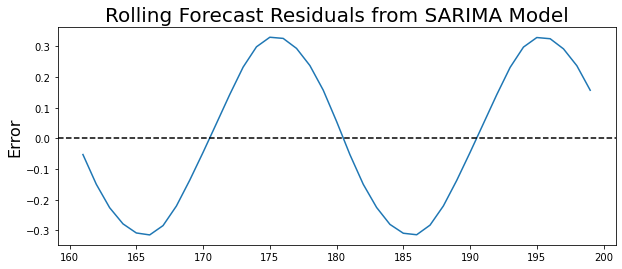

In [112]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

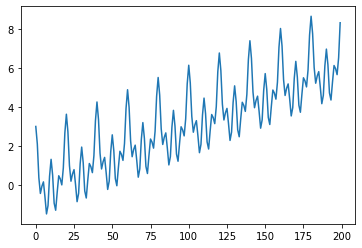

In [113]:
plt.plot(used_dataset)

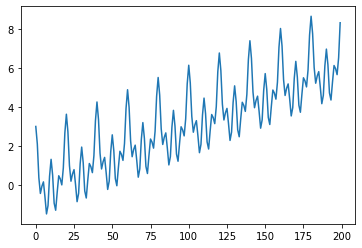

In [114]:
plt.plot(data)

Text(0, 0.5, 'y')

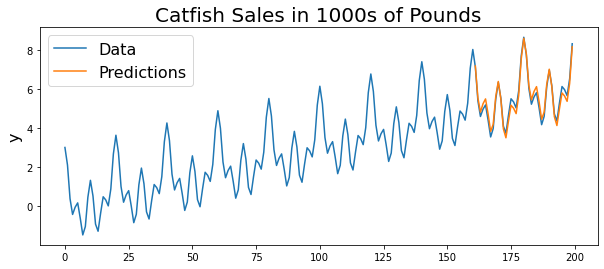

In [115]:
plt.figure(figsize=(10,4))

plt.plot(data)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('y', fontsize=16)

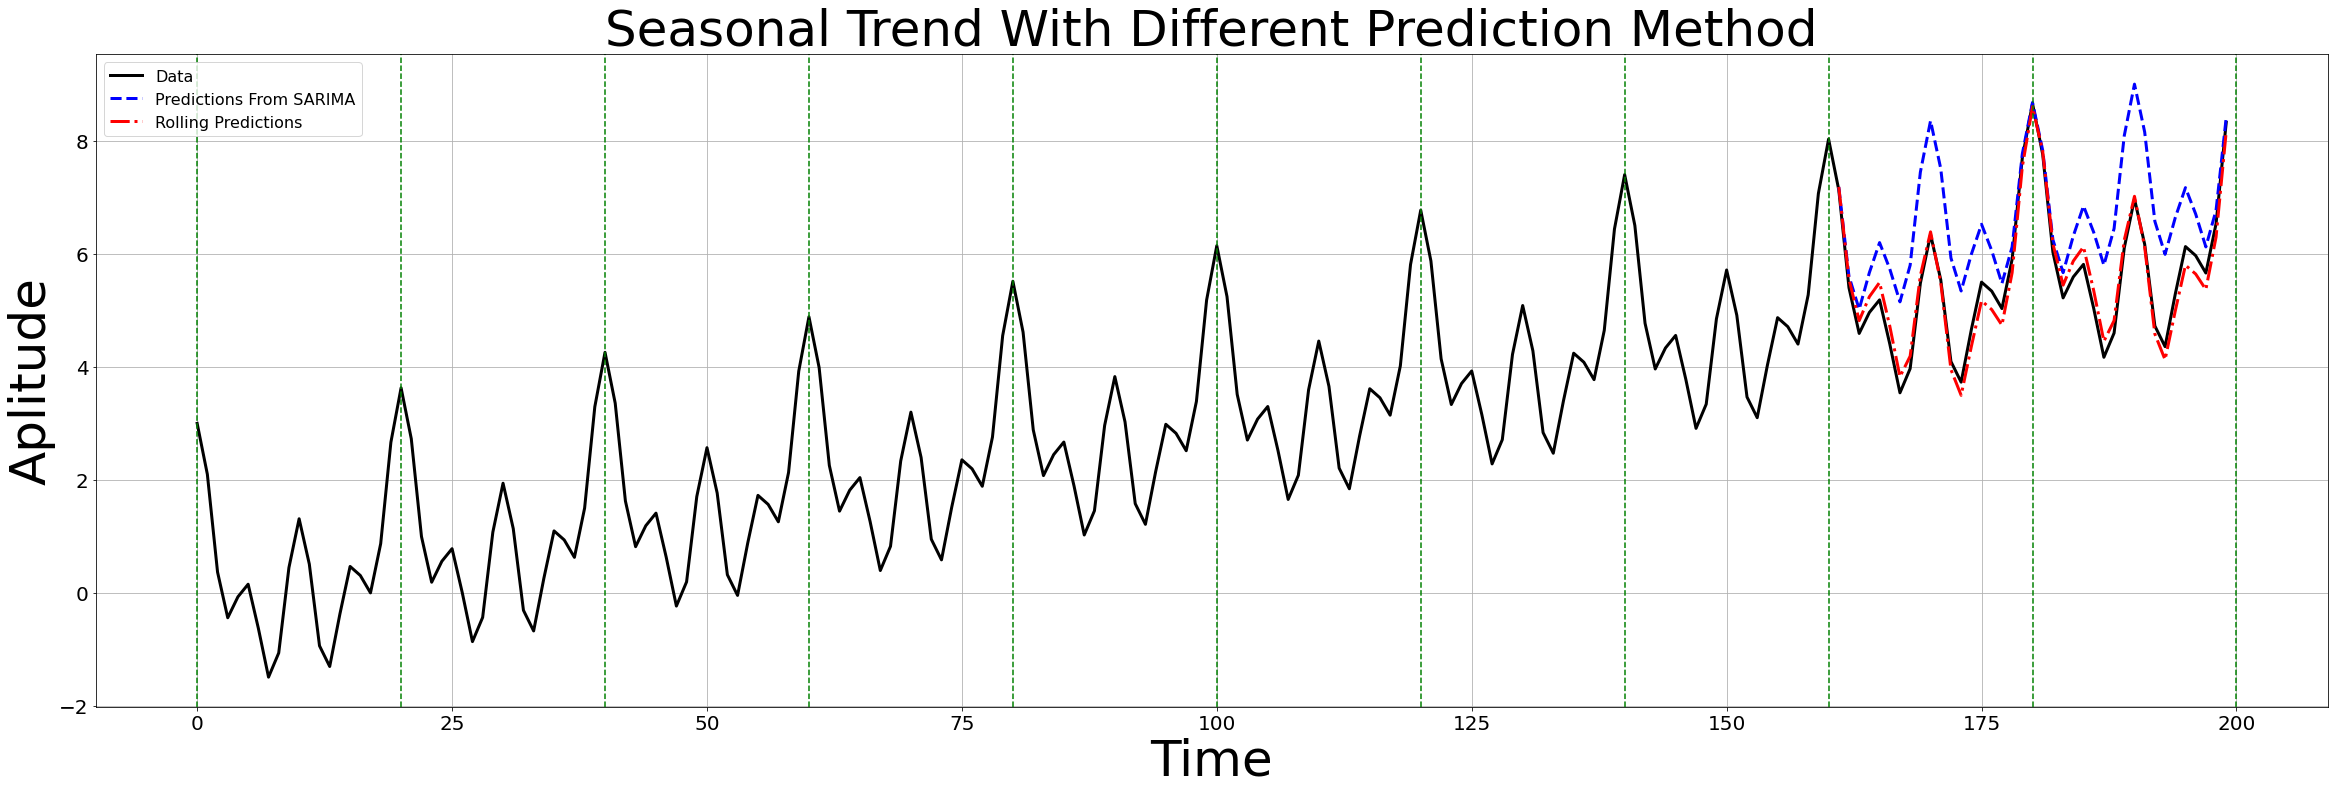

In [138]:
plt.figure(figsize=(40,12))

plt.plot(data, color='black', linewidth=3.0)
plt.plot(predictions, color='blue', linewidth=3.0, linestyle='--')
plt.plot(rolling_predictions, color='red', linewidth=3.0, linestyle='dashdot')

plt.axvline(x=20*0, color='green', linestyle='--')
plt.axvline(x=20*1, color='green', linestyle='--')
plt.axvline(x=20*2, color='green', linestyle='--')
plt.axvline(x=20*3, color='green', linestyle='--')
plt.axvline(x=20*4, color='green', linestyle='--')
plt.axvline(x=20*5, color='green', linestyle='--')
plt.axvline(x=20*6, color='green', linestyle='--')
plt.axvline(x=20*7, color='green', linestyle='--')
plt.axvline(x=20*8, color='green', linestyle='--')
plt.axvline(x=20*9, color='green', linestyle='--')
plt.axvline(x=20*10, color='green', linestyle='--')

plt.title('Seasonal Trend With Different Prediction Method', fontsize=50)
plt.xlabel('Time', fontsize=50)
plt.ylabel('Aplitude', fontsize=50)
plt.grid(True, which='both')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(('Data', 'Predictions From SARIMA', 'Rolling Predictions'), fontsize=16)

plt.savefig('Seasonal Trend With Different Prediction Method')